## __Problem Statement:__

For the given dataset, perform EDA with visualization, I'll formulate 2 questions on the given data and answer the same. Then proceed to to build an ensemble classifier using 3 ML algorithms and find out which algorithm best suits the dataset with respect to the accuracy of the algorithm.
#### __Procedure:__

   1. The dataset is to be analysed and preliminary data cleaning is to be done.
   2. Data exploration and feature selection are to be done for fine tuning of dataset.
   3. ML ensemble modelling and accuracy checking to find the optimal algorithm for the dataset.


#### __Questions to be answered at the end of EDA:__
   1. Text analysis based on common words used by Males & Females ?
   2. How significant are the color attributes used by the users ?


In [1]:
import pandas as pd       #for data manipulation and analysis
import numpy as np       # provide multi-dimensional arrays
import matplotlib.pyplot as plt  #for data visulization
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [ ]:
df = pd.read_csv("information.csv", engine = 'python')  #read dataset 
df.iloc[:,10:25].head(5)

,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location
0,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3
1,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ï¿½ï¿½ï¿½It felt like they were my friends and...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN
2,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl
3,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA"
4,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN


### Visualizing null values to get a better idea of the dataset & it's trends

In [ ]:
df.shape

(20050, 26)

In [ ]:
col = df.columns.tolist() #convert all columns present in dataset into list
col

['_unit_id',
 '_golden',
 '_unit_state',
 '_trusted_judgments',
 '_last_judgment_at',
 'gender',
 'gender:confidence',
 'profile_yn',
 'profile_yn:confidence',
 'created',
 'description',
 'fav_number',
 'gender_gold',
 'link_color',
 'name',
 'profile_yn_gold',
 'profileimage',
 'retweet_count',
 'sidebar_color',
 'text',
 'tweet_coord',
 'tweet_count',
 'tweet_created',
 'tweet_id',
 'tweet_location',
 'user_timezone']

In [ ]:
for i in range(len(col)):         #replace ':' with '_' in dataset columns
    col[i] = col[i].rstrip()
    col[i] = col[i].replace(':','_')
    if col[i][0] == '_':
        col[i] = col[i][1:]
print(col)

['unit_id', 'golden', 'unit_state', 'trusted_judgments', 'last_judgment_at', 'gender', 'gender_confidence', 'profile_yn', 'profile_yn_confidence', 'created', 'description', 'fav_number', 'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage', 'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count', 'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone']


In [ ]:
df = pd.read_csv("information.csv", engine='python', names = col)   #again read dataset using read_csv by using updated columns
df = df.iloc[1:,:]
df.head(4)

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,gender,gender_confidence,profile_yn,profile_yn_confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
1,815719226,FALSE,finalized,3,10/26/15 23:24,male,1,yes,1,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.5873E+17,main; @Kan1shk3,Chennai
2,815719227,FALSE,finalized,3,10/26/15 23:30,male,1,yes,1,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ï¿½ï¿½ï¿½It felt like they were my friends and...,NaN,7471,10/26/15 12:40,6.5873E+17,NaN,Eastern Time (US & Canada)
3,815719228,FALSE,finalized,3,10/26/15 23:33,male,0.6625,yes,1,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.5873E+17,clcncl,Belgrade
4,815719229,FALSE,finalized,3,10/26/15 23:10,male,1,yes,1,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.5873E+17,"Palo Alto, CA",Pacific Time (US & Canada)


In [ ]:
df.nunique() #shows no. of unique elements in each columns

unit_id                  20050
golden                       2
unit_state                   2
trusted_judgments           32
last_judgment_at           283
gender                       4
gender_confidence          923
profile_yn                   2
profile_yn_confidence      267
created                  18699
description              15130
fav_number                6784
gender_gold                  6
link_color                3001
name                     18795
profile_yn_gold              1
profileimage             17164
retweet_count               22
sidebar_color              561
text                     18411
tweet_coord                146
tweet_count              14280
tweet_created                5
tweet_id                     2
tweet_location            7857
user_timezone              156
dtype: int64

In [ ]:
# Drop the unwanted features from the dataset
df.drop(['unit_state', 'golden', 'user_timezone', 'profile_yn', 'tweet_location', 'tweet_created', 'trusted_judgments', 'tweet_coord', 'profile_yn_gold', 'gender_gold', 'last_judgment_at', 'name', 'link_color', 'fav_number', 'profileimage', 'profile_yn_gold', 'sidebar_color', 'created', 'tweet_id'], inplace = True, axis =1)
df.head()   

,unit_id,gender,gender_confidence,profile_yn_confidence,description,retweet_count,text,tweet_count
1,815719226,male,1,1,i sing my own rhythm.,0,Robbie E Responds To Critics After Win Against...,110964
2,815719227,male,1,1,I'm the author of novels filled with family dr...,0,ï¿½ï¿½ï¿½It felt like they were my friends and...,7471
3,815719228,male,0.6625,1,louis whining and squealing and all,1,i absolutely adore when louis starts the songs...,5617
4,815719229,male,1,1,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0,Hi @JordanSpieth - Looking at the url - do you...,1693
5,815719230,female,1,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,0,Watching Neighbours on Sky+ catching up with t...,31462


In [ ]:
df[['tweet_count', 'retweet_count']] = df[['tweet_count', 'retweet_count']].apply(np.int64) #convert float numbers into integers

In [ ]:
df[['gender_confidence', 'profile_yn_confidence']] = df[['gender_confidence', 'profile_yn_confidence']].apply(np.float64)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [ ]:
df.gender.value_counts() #count the frequency of attributes present in gender

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

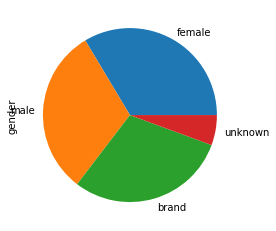

In [ ]:
df.gender.value_counts().plot(kind = 'pie')  #plot graph on gender column

In [ ]:
df['gender'] = df['gender'].replace(['unknown', 'brand'], np.NaN)  #replace 'unknown','brand' into nan(not a number) value

In [ ]:
df.drop_duplicates() #drop duplicates present in dataframe
df.shape

(20050, 8)

In [ ]:
df.dropna(subset = ['gender'], axis = 0, inplace = True)  #drop nullvalues present in df['gender']
df.shape

(12894, 8)

In [ ]:
df.head()

,unit_id,gender,gender_confidence,profile_yn_confidence,description,retweet_count,text,tweet_count
1,815719226,male,1.0000,1.0,i sing my own rhythm.,0,Robbie E Responds To Critics After Win Against...,110964
2,815719227,male,1.0000,1.0,I'm the author of novels filled with family dr...,0,ï¿½ï¿½ï¿½It felt like they were my friends and...,7471
3,815719228,male,0.6625,1.0,louis whining and squealing and all,1,i absolutely adore when louis starts the songs...,5617
4,815719229,male,1.0000,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0,Hi @JordanSpieth - Looking at the url - do you...,1693
5,815719230,female,1.0000,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,0,Watching Neighbours on Sky+ catching up with t...,31462


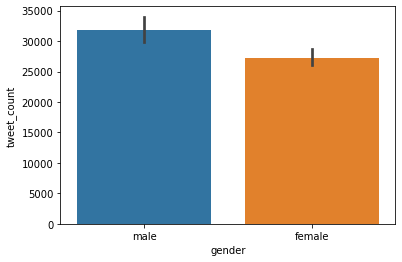

In [ ]:
import seaborn as sns   #for data visualization
sns.barplot (x = 'gender', y = 'tweet_count', data = df) #graph comparison between gender and tweet_count 

# On analysis Male has largest tweet counts

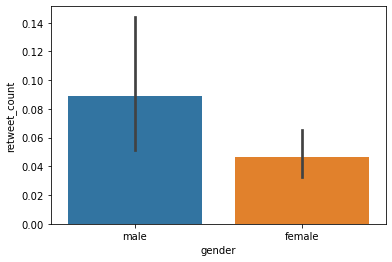

In [ ]:
sns.barplot (x = 'gender', y = 'retweet_count',data = df)  #graph comparison between gender and retweet_count 

# On analysis Male has largest retweet counts

In [ ]:
df.nunique()

unit_id                  12894
gender                       2
gender_confidence          791
profile_yn_confidence      160
description              10648
retweet_count               17
text                     12723
tweet_count               9926
dtype: int64

In [ ]:
df.isnull().sum()

unit_id                     0
gender                      0
gender_confidence           0
profile_yn_confidence       0
description              1700
retweet_count               0
text                        0
tweet_count                 0
dtype: int64

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.drop(['index'], axis = 1, inplace = True)

In [ ]:
df.head()

,unit_id,gender,gender_confidence,profile_yn_confidence,description,retweet_count,text,tweet_count
0,815719226,male,1.0000,1.0,i sing my own rhythm.,0,Robbie E Responds To Critics After Win Against...,110964
1,815719227,male,1.0000,1.0,I'm the author of novels filled with family dr...,0,ï¿½ï¿½ï¿½It felt like they were my friends and...,7471
2,815719228,male,0.6625,1.0,louis whining and squealing and all,1,i absolutely adore when louis starts the songs...,5617
3,815719229,male,1.0000,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0,Hi @JordanSpieth - Looking at the url - do you...,1693
4,815719230,female,1.0000,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,0,Watching Neighbours on Sky+ catching up with t...,31462


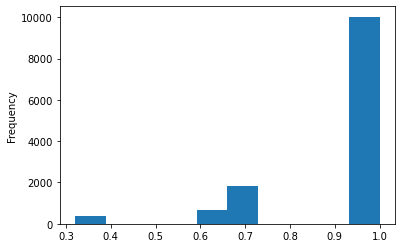

In [ ]:
df.gender_confidence.plot(kind = 'hist') #analysis of outliers

### we can ignore the tuples whose gender_confidence other than 1

In [ ]:
df = df[df.gender_confidence == 1] #removing outliers

In [ ]:
df.shape

(10020, 8)

In [ ]:
df.text.head()

0    Robbie E Responds To Critics After Win Against...
1    ï¿½ï¿½ï¿½It felt like they were my friends and...
3    Hi @JordanSpieth - Looking at the url - do you...
4    Watching Neighbours on Sky+ catching up with t...
5    Ive seen people on the train with lamps, chair...
Name: text, dtype: object

In [ ]:
from nltk.corpus import stopwords 

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords') 

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [ ]:
list_stopwords = stopwords.words('English') #words which does not add much meaning to a sentence
print(list_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [ ]:
df.shape

(10020, 8)

In [ ]:
df.gender.unique()

array(['male', 'female'], dtype=object)

# cleaning of text 

In [ ]:
clean_text = []           
for i in range(df.shape[0]):
    text = df['text'].values[i]
    tokenized_words = word_tokenize(text)
    text_cleaned = ''
    for word in tokenized_words:
        word = word.lower()
        if not word in list_stopwords and 'ï' not in word and '~' not in word and '!' not in word and '@' not in word and '#' not in word and '$' not in word and '%' not in word and '^' not in word and '&' not in word and '*' not in word and '(' not in word and ')' not in word and '_' not in word and '+' not in word and ':' not in word and '<' not in word and '>' not in word and ',' not in word and '.' not in word and '"' not in word and "'" not in word and '?' not in word and word != 'https' and '-' not in word and ';' not in word and ',' not in word and ']' not in word and '[' not in word and '`' not in word and '0' not in word and '1' not in word and '2' not in word and '3' not in word and '4' not in word and '5' not in word and '6' not in word and '7' not in word and '8' not in word and '9' not in word and '»' not in word:
            text_cleaned += word + ' '
    text_cleaned = text_cleaned.strip()
    clean_text.append(text_cleaned)

In [ ]:
df['clean_text'] = clean_text # add extra feature to the dataframe

In [ ]:
df.drop(['text'], axis = 1, inplace = True)   #drop the uncleaned text

In [ ]:
df.drop(['gender_confidence', 'profile_yn_confidence'], axis = 1, inplace = True) #remove gender_confidence and profile_yn_confidence

In [ ]:
df['tweet_count'] = df.tweet_count.apply(np.int64)

In [ ]:
df['retweet_count'] = df.retweet_count.apply(np.int64)

In [ ]:
df.head()

,unit_id,gender,description,retweet_count,tweet_count,clean_text
0,815719226,male,i sing my own rhythm.,0,110964,robbie e responds critics win eddie edwards wo...
1,815719227,male,I'm the author of novels filled with family dr...,0,7471,felt like friends living story retired
3,815719229,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0,1693,hi jordanspieth looking url use ifttt typicall...
4,815719230,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,0,31462,watching neighbours catching neighbs xxx xxx
5,815719231,female,you don't know me.,0,20036,ive seen people train lamps chairs tvs etc


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df['unit_id'] = df.unit_id.apply(np.int64)

In [ ]:
male_word_list = df[df.gender == 'male'].clean_text.values  #convert into numpy array
male_word_list

array(['robbie e responds critics win eddie edwards worldtitleseries',
       'felt like friends living story retired',
       'hi jordanspieth looking url use ifttt typically see advanced user pgatour',
       ..., 'game faggot venison loin crisp spelt quince',
       'greg hardy good player get face dez bryant learn place mane',
       'miss people still never want see'], dtype=object)

In [ ]:
female_word_list = df[df.gender == 'female'].clean_text.values #convert into numpy array
female_word_list

array(['watching neighbours catching neighbs xxx xxx',
       'ive seen people train lamps chairs tvs etc',
       'pic defines mcd fangirls/fanboys mcd shippers xd', ...,
       'need ride home practice raining hard asf',
       'lookupondeath fine drink tea love',
       'think apush creative project going bring bacon class eat represent bacon rebellion'],
      dtype=object)

In [ ]:
male_words = {}

In [ ]:
for word in male_word_list:        #find most man common words
    word = word.split()
    for i in range(len(word)):
        if word[i] in male_words:
            male_words[word[i]] += 1
        else:
            male_words[word[i]] = 1

In [ ]:
female_words = {}

In [ ]:
for word in female_word_list:   #find most woman common words
    word = word.split()
    for i in range(len(word)):
        if word[i] in female_words:
            female_words[word[i]] += 1
        else:
            female_words[word[i]] = 1

In [ ]:
fms = pd.Series(female_words)
female_most_common_words = fms.sort_values(ascending = False)[:25]
female_most_common_words

like      355
get       302
one       259
love      247
day       245
go        217
people    202
time      194
got       184
know      164
amp       161
best      155
want      152
new       150
good      145
still     136
back      134
na        128
last      128
ca        128
need      125
see       122
u         120
today     118
life      115
dtype: int64

In [ ]:
ms = pd.Series(male_words)
male_most_common_words = ms.sort_values(ascending = False)[:25]
male_most_common_words

like      269
get       258
one       192
time      178
new       166
people    151
go        150
love      150
got       145
good      140
know      133
back      129
think     125
see       125
day       122
best      121
amp       115
would     115
make      113
still     104
need      100
game       98
great      97
last       94
want       93
dtype: int64

### Most common words used my male

In [1]:
male_most_common_words.plot(kind = 'bar')

NameError: ignored

### Most common words used my female

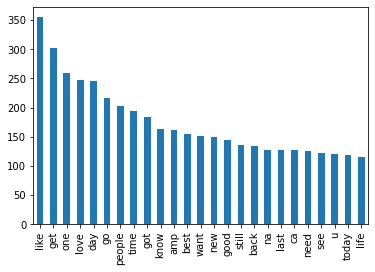

In [ ]:
female_most_common_words.plot(kind = 'bar', )

In [ ]:
male_lst = []
female_lst = []

In [ ]:
for sent in female_word_list:
    sent = sent.split()
    for i in sent:
        female_lst.append(i)

for sent in male_word_list:
    sent = sent.split()
    for i in sent:
        male_lst.append(i)

In [ ]:
from spellchecker import SpellChecker

In [ ]:
spell = SpellChecker()
male_typos = spell.unknown(male_lst)
female_typos = spell.unknown(female_lst)

In [ ]:
print('number of male typos :' , len(male_typos))
print('number of female typos :', len(female_typos))

number of male typos : 3813
number of female typos : 3551


### comparision of typos done by male and female in their respective tweets

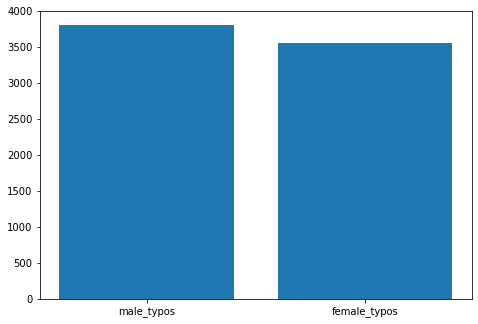

In [ ]:
names = ['male_typos', 'female_typos']
values = [len(male_typos), len(female_typos)]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(names, values)
plt.show()


In [ ]:
fms = fms.sort_values(ascending = False)[:950]
ms = ms.sort_values(ascending = False)[:950]

In [ ]:
clean_text = []
for i in range(df.shape[0]):
    text = df['clean_text'].values[i]
    tokenized_words = word_tokenize(text)
    text_cleaned = ''
    for word in tokenized_words:
        if df['gender'].values[i] == 'male':
            if word in ms:
                text_cleaned += word + ' '
        else:
            if word in fms:
                text_cleaned += word + ' '
    text_cleaned = text_cleaned.strip()
    clean_text.append(text_cleaned)

In [ ]:
df['cleaned_tweet'] = clean_text

In [ ]:
df.head()

,unit_id,gender,description,retweet_count,tweet_count,clean_text,cleaned_tweet
0,815719226,male,i sing my own rhythm.,0,110964,robbie e responds critics win eddie edwards wo...,win
1,815719227,male,I'm the author of novels filled with family dr...,0,7471,felt like friends living story retired,like friends living story
3,815719229,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0,1693,hi jordanspieth looking url use ifttt typicall...,hi looking use see
4,815719230,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,0,31462,watching neighbours catching neighbs xxx xxx,watching
5,815719231,female,you don't know me.,0,20036,ive seen people train lamps chairs tvs etc,ive seen people train


In [ ]:
df.drop(['clean_text'], axis = 1, inplace = True)

In [ ]:
df.head(3)

,unit_id,gender,description,retweet_count,tweet_count,cleaned_tweet
0,815719226,male,i sing my own rhythm.,0,110964,win
1,815719227,male,I'm the author of novels filled with family dr...,0,7471,like friends living story
3,815719229,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0,1693,hi looking use see


## __Training & Testing of ML algorithms__
The following classifiers have been chosen for training on the dataset :-

    1. Logistic Regression
    2. Random forest
    3. SVM Classifier
    4. Naive Bayes

The ML algorithms are trained on each feature of the dataset and the algorithm with the maximum accuracy is the most optimal model for this dataset and the feature that gives maximum accuracy is the optimal feature for classification of this data.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()

In [ ]:
sm = cv.fit_transform(df['cleaned_tweet']) #vectorized form of cleaned tweet text

In [ ]:
df.shape

(10020, 6)

In [ ]:
sm

<10020x1206 sparse matrix of type '<class 'numpy.int64'>'
	with 43597 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(sm, df['gender']) #dependent variable is gender and independent variable is cleaned tweet

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7515, 1206), (2505, 1206), (7515,), (2505,))

### Modelling for Naive_bayes >>>

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nv = MultinomialNB()

In [ ]:
nv.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = nv.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_pred, y_test)

0.7201596806387226

### Modelling for SVM >>>

In [ ]:
from sklearn.svm import SVC  #import support vector machine 
sv = SVC()

In [ ]:
sv.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = sv.predict(x_test)

In [ ]:
accuracy_score(y_pred, y_test)

0.6750499001996008

### Modelling for Random Forest >>>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)

rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)

In [ ]:
accuracy_score(y_pred, y_test)

0.6818363273453094

### Modelling for Logistic Regression >>>

In [ ]:
from sklearn.linear_model import LogisticRegression

lg=RandomForestClassifier(n_estimators=200)

lg.fit(x_train,y_train)

y_pred=lg.predict(x_test)

In [ ]:
accuracy_score(y_pred, y_test)

0.6782435129740519

### __Experimental Results__of the Ensemble learning model of Machine Learning on given dataset

    Logistic Regression: 68%
    Random Forest: 68%
    SVM: 68%
    Naive Bayes: 72%

## <u>Winner: Naive Bayes</u>